In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from matplotlib.ticker import MaxNLocator

# Dataset filename
dataset = 'DC.csv'

# Load csv file
data_dc = pd.read_csv(
    dataset,
    sep=',',
    low_memory=False
)

print('Original count of records: '
      + str(data_dc.ID.count()))

Original count of records: 158957


In [2]:
# Delete records with null PRICE and removing irelevant columns

data_dc = data_dc.drop(['SALEDATE','ROOF','STYLE','SALE_NUM','ZIPCODE','LIVING_GBA','USECODE','GIS_LAST_MOD_DTTM','SOURCE','CMPLX_NUM','LATITUDE','LONGITUDE','ASSESSMENT_SUBNBHD','CENSUS_TRACT','FULLADDRESS','NATIONALGRID','CENSUS_BLOCK','STATE','CITY','EXTWALL','INTWALL','WARD','X','Y','QUADRANT'],axis=1)

data_dc = data_dc[pd.notnull(data_dc['PRICE'])]
data_dc = data_dc.drop(data_dc[data_dc['ROOMS']==0].index)
data_dc = data_dc.drop(data_dc[data_dc['BEDRM']==0].index)

data_dc.STORIES = data_dc.STORIES.fillna(1)


print('Count of records after removing null atribute: ' + str(data_dc.ID.count()))

Count of records after removing null atribute: 94405


In [3]:
# show data types - je potrebne object atributy prekonvertovat do numerickych 
data_dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94405 entries, 0 to 158954
Data columns (total 24 columns):
ID                 94405 non-null int64
BATHRM             94405 non-null int64
HF_BATHRM          94405 non-null int64
HEAT               94405 non-null object
AC                 94405 non-null object
NUM_UNITS          57832 non-null float64
ROOMS              94405 non-null int64
BEDRM              94405 non-null int64
AYB                94295 non-null float64
YR_RMDL            54854 non-null float64
EYB                94405 non-null int64
STORIES            94405 non-null float64
PRICE              94405 non-null float64
QUALIFIED          94405 non-null object
GBA                57832 non-null float64
BLDG_NUM           94405 non-null int64
STRUCT             57832 non-null object
GRADE              57832 non-null object
CNDTN              57832 non-null object
KITCHENS           57831 non-null float64
FIREPLACES         94405 non-null int64
LANDAREA           94405 non-n

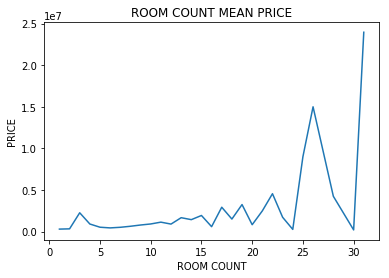

In [4]:
rooms = data_dc[['ROOMS', 'PRICE']]
rooms_grouped = rooms.groupby('ROOMS').mean().astype(int)
rooms_grouped = rooms_grouped.reset_index()
x = rooms_grouped['ROOMS']
y = rooms_grouped['PRICE']
plt.plot(x, y)
plt.xlabel('ROOM COUNT')
plt.ylabel('PRICE')
plt.title('ROOM COUNT MEAN PRICE')
plt.show()

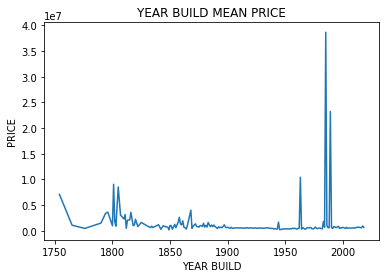

In [5]:

ayb = data_dc[['AYB', 'PRICE']]
ayb_grouped = ayb.groupby('AYB').mean().astype(int)
ayb_grouped = ayb_grouped.reset_index()
x = ayb_grouped['AYB']
y = ayb_grouped['PRICE']
plt.plot(x, y)
plt.xlabel('YEAR BUILD')
plt.ylabel('PRICE')
plt.title('YEAR BUILD MEAN PRICE')
plt.show()

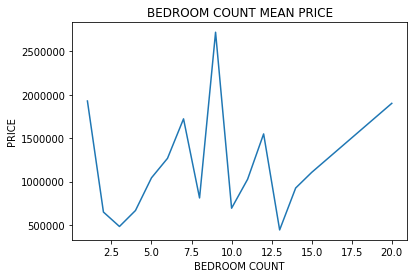

In [6]:
bedrm = data_dc[['BEDRM', 'PRICE']]
bedrm_grouped = bedrm.groupby('BEDRM').mean().astype(int)
bedrm_grouped = bedrm_grouped.reset_index()
x = bedrm_grouped['BEDRM']
y = bedrm_grouped['PRICE']
plt.plot(x, y)
plt.xlabel('BEDROOM COUNT')
plt.ylabel('PRICE')
plt.title('BEDROOM COUNT MEAN PRICE')
plt.show()

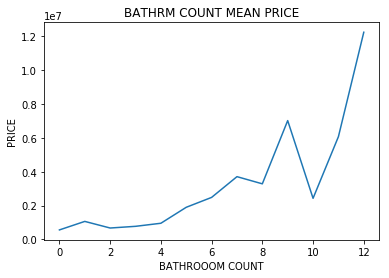

In [7]:
bathrm = data_dc[['BATHRM', 'PRICE']]
bathrm_grouped = bathrm.groupby('BATHRM').mean().astype(int)
bathrm_grouped = bathrm_grouped.reset_index()
x = bathrm_grouped['BATHRM']
y = bathrm_grouped['PRICE']
plt.plot(x, y)
plt.xlabel('BATHROOOM COUNT')
plt.ylabel('PRICE')
plt.title('BATHRM COUNT MEAN PRICE')
plt.show()

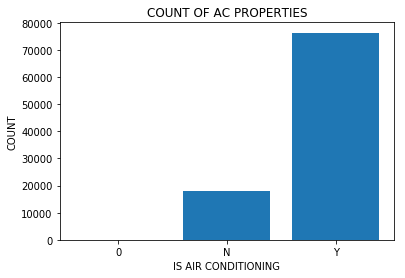

In [8]:
ac = data_dc[['AC', 'ID']]
ac_gouped = ac.groupby('AC').count()
ac_gouped = ac_gouped.reset_index()
plt.bar(ac_gouped['AC'], ac_gouped['ID'])
plt.xlabel('IS AIR CONDITIONING')
plt.ylabel('COUNT')
plt.title('COUNT OF AC PROPERTIES')
plt.show()

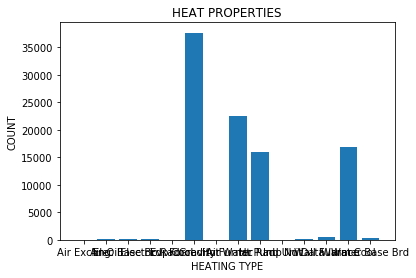

In [9]:
heat = data_dc[['HEAT', 'ID']]
heat_gouped = heat.groupby('HEAT').count()
heat_gouped = heat_gouped.reset_index()
plt.bar(heat_gouped['HEAT'], heat_gouped['ID'])
plt.xlabel('HEATING TYPE')
plt.ylabel('COUNT')
plt.title('HEAT PROPERTIES')
plt.show()

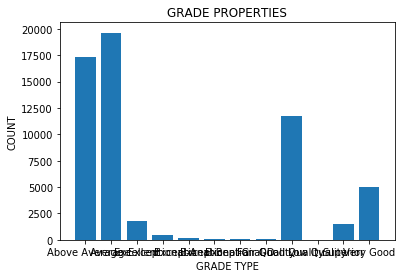

In [10]:
grade = data_dc[['GRADE', 'ID']]
grade_gouped = grade.groupby('GRADE').count()
grade_gouped = grade_gouped.reset_index()
plt.bar(grade_gouped['GRADE'], grade_gouped['ID'])
plt.xlabel('GRADE TYPE')
plt.ylabel('COUNT')
plt.title('GRADE PROPERTIES')
plt.show()

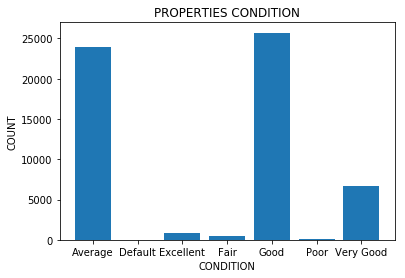

In [11]:
cndtn = data_dc[['CNDTN', 'ID']]
cndtn_gouped = cndtn.groupby('CNDTN').count()
cndtn_gouped = cndtn_gouped.reset_index()
plt.bar(cndtn_gouped['CNDTN'], cndtn_gouped['ID'])
plt.xlabel('CONDITION')
plt.ylabel('COUNT')
plt.title('PROPERTIES CONDITION')
plt.show()

In [12]:
data_dc

ID  BATHRM  HF_BATHRM           HEAT AC  NUM_UNITS  ROOMS  BEDRM  \
0            0       4          0      Warm Cool  Y        2.0      8      4   
2            2       3          1  Hot Water Rad  Y        2.0      9      5   
3            3       3          1  Hot Water Rad  Y        2.0      8      5   
5            5       3          2  Hot Water Rad  Y        1.0     10      5   
7            7       3          1  Hot Water Rad  Y        2.0      8      4   
8            8       3          1      Warm Cool  Y        2.0      7      3   
14          14       3          1      Warm Cool  Y        2.0      5      3   
16          16       3          1      Warm Cool  Y        1.0      8      3   
19          19       3          1  Hot Water Rad  Y        2.0      9      3   
20          20       3          1  Hot Water Rad  Y        1.0     14      5   
22          22       1          0     Forced Air  Y        1.0      6      3   
23          23       2          1     Forced Air  Y        1.0      5      3   
24          24       2          1  Hot Water Rad  Y        1.0      8      3   
25          25       1          0  Hot Water Rad  N        1.0      8      4   
27          27       3          0  Hot Water Rad  Y        4.0      9      3   
29          29       3          1     Forced Air  Y        2.0     11      3   
32          32       2          1     Forced Air  Y        1.0      6      2   
37          37       2          2      Warm Cool  Y        2.0      8      4   
40          40       3          1     Forced Air  Y        2.0      9      4   
41          41       3          1      Warm Cool  Y        2.0      9      4   
42          42       3          1     Forced Air  Y        2.0      9      4   
43          43       3          1     Forced Air  Y        2.0     13      4   
44          44       3          2     Forced Air  Y        2.0     10      4   
45          45       3          1     Forced Air  Y        2.0     10      5   
46          46       3          1      Warm Cool  Y        2.0      9      4   
48          48       2          1     Forced Air  N        2.0      8      3   
50          50       2          1     Forced Air  Y        2.0      8      3   
52          52       3          1     Forced Air  Y        2.0      5      4   
54          54       1          1     Forced Air  Y        2.0      4      2   
55          55       3          1     Forced Air  Y        2.0      8      3   
...        ...     ...        ...            ... ..        ...    ...    ...   
158916  158916       1          0     Forced Air  Y        NaN      3      1   
158918  158918       2          1     Forced Air  Y        NaN      4      2   
158919  158919       2          1     Forced Air  Y        NaN      4      2   
158920  158920       3          1        Ht Pump  Y        NaN      5      3   
158921  158921       3          1        Ht Pump  Y        NaN      5      3   
158924  158924       1          0        Ht Pump  Y        NaN      5      2   
158926  158926       1          0        Ht Pump  Y        NaN      5      2   
158928  158928       2          1        Ht Pump  Y        NaN      5      2   
158929  158929       2          1        Ht Pump  Y        NaN      5      2   
158930  158930       2          0     Forced Air  N        NaN      4      2   
158931  158931       2          1     Forced Air  N        NaN      4      2   
158932  158932       2          1     Forced Air  N        NaN      4      2   
158933  158933       2          0        Ht Pump  Y        NaN      4      2   
158934  158934       1          1        Ht Pump  Y        NaN      3      1   
158935  158935       1          0        Ht Pump  Y        NaN      3      1   
158936  158936       1          0        Ht Pump  Y        NaN      3      1   
158938  158938       2          0      Warm Cool  Y        NaN      7      4   
158939  158939       1          0     Forced Air  Y        NaN      4      2   
158943  1589

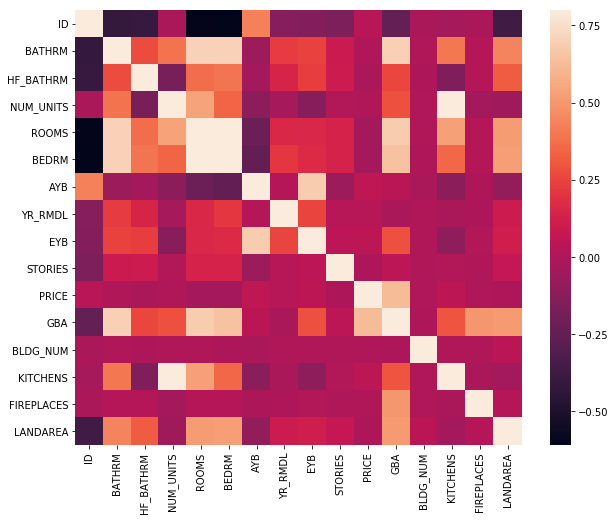

In [13]:
corlacia = data_dc.corr()
plt.subplots(figsize=(10, 8))
seaborn.heatmap(corlacia, vmax=.8);
#korelacia medzi num_units a kitchen mozno ukazuje nejaku chybu